## Neural Network
In this exercise, we will use Neural Networks to perform Linear Regression.

The objective is to build a 2-hidden layers fully connected neural network (a.k.a multilayer perceptron) with TensorFlow using some of the higher-level wrappers (tf.estimators, tf.layers, tf.metrics, ...), you can check 'neural_network_raw' example for a raw, and more detailed TensorFlow implementation.

Further, we will use the MNIST Dataset used in the last exercise.

In [1]:
from __future__ import print_function

# Import MNIST data
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/tmp/data/", one_hot=False)

import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


Set the parameters.

In [2]:
learning_rate = 0.1
num_steps = 300
batch_size = 128

# Network Parameters
n_hidden_1 = 128 # 1st layer number of neurons
n_hidden_2 = 128 # 2nd layer number of neurons
num_input = 784 # MNIST data input (img shape: 28*28)
num_classes = 10 # MNIST total classes (0-9 digits)

Define the input function for training.

In [3]:
input_fn = tf.estimator.inputs.numpy_input_fn(
    x={'images': mnist.train.images}, y=mnist.train.labels,
    batch_size=batch_size, num_epochs=None, shuffle=True)

Define the neural network.

In [4]:
def neural_net(x_dict):
    # TF Estimator input is a dict, in case of multiple inputs
    x = x_dict['images']
    # Hidden fully connected layer with 256 neurons
    layer_1 = tf.layers.dense(x, n_hidden_1)
    # Hidden fully connected layer with 256 neurons
    layer_2 = tf.layers.dense(layer_1, n_hidden_2)
    # Output fully connected layer with a neuron for each class
    out_layer = tf.layers.dense(layer_2, num_classes)
    return out_layer

Define the model function (following __[TF Estimator Template](https://www.tensorflow.org/api_docs/python/tf/estimator/Estimator)__).

In [5]:
def model_fn(features, labels, mode):
    
    # Build the neural network
    logits = neural_net(features)
    
    # Predictions
    pred_classes = tf.argmax(logits, axis=1)
    pred_probas = tf.nn.softmax(logits)
    
    # If prediction mode, early return
    if mode == tf.estimator.ModeKeys.PREDICT:
        return tf.estimator.EstimatorSpec(mode, predictions=pred_classes) 
        
    # Define loss and optimizer
    loss_op = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(
        logits=logits, labels=tf.cast(labels, dtype=tf.int32)))
    optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
    train_op = optimizer.minimize(loss_op, global_step=tf.train.get_global_step())
    
    # Evaluate the accuracy of the model
    acc_op = tf.metrics.accuracy(labels=labels, predictions=pred_classes)
    
    # TF Estimators requires to return a EstimatorSpec, that specify
    # the different ops for training, evaluating, ...
    estim_specs = tf.estimator.EstimatorSpec(
      mode=mode,
      predictions=pred_classes,
      loss=loss_op,
      train_op=train_op,
      eval_metric_ops={'accuracy': acc_op})
    return estim_specs

Build the Estimator.

In [6]:
model = tf.estimator.Estimator(model_fn)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\yantongz\\AppData\\Local\\Temp\\tmpb26i5e3i', '_tf_random_seed': 1, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_save_checkpoints_steps': None, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100}


Train the Model.

In [7]:
model.train(input_fn, steps=num_steps)

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into C:\Users\yantongz\AppData\Local\Temp\tmpb26i5e3i\model.ckpt.
INFO:tensorflow:loss = 2.57166, step = 1
INFO:tensorflow:global_step/sec: 147.58
INFO:tensorflow:loss = 0.524499, step = 101 (0.682 sec)
INFO:tensorflow:global_step/sec: 166.308
INFO:tensorflow:loss = 0.193, step = 201 (0.598 sec)
INFO:tensorflow:Saving checkpoints for 300 into C:\Users\yantongz\AppData\Local\Temp\tmpb26i5e3i\model.ckpt.
INFO:tensorflow:Loss for final step: 0.427798.


Evaluate the Model. Define the input function for evaluating.

In [8]:
input_fn = tf.estimator.inputs.numpy_input_fn(
    x={'images': mnist.test.images}, y=mnist.test.labels,
    batch_size=batch_size, shuffle=False)
# Use the Estimator 'evaluate' method
model.evaluate(input_fn)

INFO:tensorflow:Starting evaluation at 2017-10-30-02:21:37
INFO:tensorflow:Restoring parameters from C:\Users\yantongz\AppData\Local\Temp\tmpb26i5e3i\model.ckpt-300
INFO:tensorflow:Finished evaluation at 2017-10-30-02:21:38
INFO:tensorflow:Saving dict for global step 300: accuracy = 0.9057, global_step = 300, loss = 0.328557


{'accuracy': 0.90570003, 'global_step': 300, 'loss': 0.32855731}

We now test the prediction for 10000 images.

In [9]:
# Predict single images
n_images = 10000
# Get images from test set
test_images = mnist.test.images[:n_images]
test_labels = mnist.test.labels[:n_images]
# Prepare the input data
input_fn = tf.estimator.inputs.numpy_input_fn(
    x={'images': test_images}, shuffle=False)
# Use the model to predict the images class
preds = list(model.predict(input_fn))
y_list = list(test_labels)

# Display
correct_count = 0
for i in range(n_images):
#     plt.imshow(np.reshape(test_images[i], [28, 28]), cmap='gray')
#     plt.show()
#     print("Model prediction:", preds[i])
#     print("true value:",y_list[i])
    if preds[i] == y_list[i]:
        correct_count += 1
        
print("Testing accuracy:", float(correct_count)/float(n_images))
        

INFO:tensorflow:Restoring parameters from C:\Users\yantongz\AppData\Local\Temp\tmpb26i5e3i\model.ckpt-300
Testing accuracy: 0.9057


## Q1. Plot training error and testing error vs steps 

For the same input settings, train and evaluate the model without regularization or dropout. Plot a graph with y axis being the training accuracy and test accuracy, and x-axis being the number of steps.

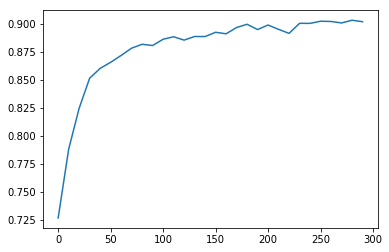

0.9041


In [18]:
#------------------ Your code here -------------------#
input_fn_train = tf.estimator.inputs.numpy_input_fn(
    x={'images': mnist.train.images}, y=mnist.train.labels,
    batch_size=batch_size, num_epochs=None, shuffle=True)

input_fn_test = tf.estimator.inputs.numpy_input_fn(
    x={'images': mnist.test.images}, y=mnist.test.labels,
    batch_size=batch_size, shuffle=False)

input_fn_train2 = tf.estimator.inputs.numpy_input_fn(
    x={'images': mnist.train.images}, y=mnist.train.labels,
    batch_size=batch_size, shuffle=False)

model = tf.estimator.Estimator(model_fn)
# close the logging info...
tf.logging.set_verbosity(0)

# the total num of steps is 300 = 10*30
train_err = []
for i in range(30):
    model.train(input_fn_train, steps=10)
    train_err.append(model.evaluate(input_fn_train2)['accuracy'])

x_axis = list(range(0,300,10))
plt.plot(x_axis, train_err)
plt.show()

test_err = (model.evaluate(input_fn_test)['accuracy'])

print(test_err)

# -----------------------------------------------------#

## Q2. Plot training error and testing error vs steps WITH regularization


For the same input settings, train and evaluate the model with regularization. 
By trial and error, choose a regularization parameter that improves the teset accuracy (change the architecture such as the number of layers and/or the number of nodes in th elayer, batch size, etc if you need to).
Plot a graph with y axis being the training accuracy and test accuracy, and x-axis being the number of steps.


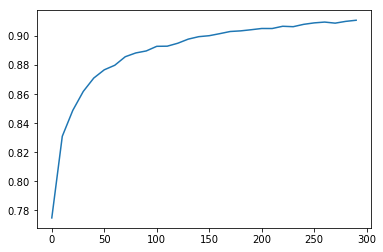

[0.91409999]


In [43]:
#------------------ Your code here -------------------#

learning_rate = 0.1
batch_size = 2048    # By trial and error

input_fn_train = tf.estimator.inputs.numpy_input_fn(
    x={'images': mnist.train.images}, y=mnist.train.labels,
    batch_size=batch_size, num_epochs=None, shuffle=True)

input_fn_test = tf.estimator.inputs.numpy_input_fn(
    x={'images': mnist.test.images}, y=mnist.test.labels,
    batch_size=batch_size, shuffle=False)

input_fn_train2 = tf.estimator.inputs.numpy_input_fn(
    x={'images': mnist.train.images}, y=mnist.train.labels,
    batch_size=batch_size, shuffle=False)


# Network Parameters
n_hidden_1 = 128 # 1st layer number of neurons
n_hidden_2 = 128 # 2nd layer number of neurons

def neural_net(x_dict):
    # TF Estimator input is a dict, in case of multiple inputs
    x = x_dict['images']
    # Hidden fully connected layer with 256 neurons
    layer_1 = tf.layers.dense(x, n_hidden_1)
    # Hidden fully connected layer with 256 neurons
    layer_2 = tf.layers.dense(layer_1, n_hidden_2)
    # Output fully connected layer with a neuron for each class
    out_layer = tf.layers.dense(layer_2, num_classes)
    return out_layer

def model_reg_fn(features, labels, mode):
    
    # Build the neural network
    logits = neural_net(features)
    
    # Predictions
    pred_classes = tf.argmax(logits, axis=1)
    pred_probas = tf.nn.softmax(logits)
    
    # If prediction mode, early return
    if mode == tf.estimator.ModeKeys.PREDICT:
        return tf.estimator.EstimatorSpec(mode, predictions=pred_classes) 
        
    # Define loss and optimizer
    # WITH regularization
    beta = 0.01                    # By trial and error
    weights = tf.Variable(tf.truncated_normal([num_input, num_classes]))
    regularizer = tf.nn.l2_loss(weights)
    
    loss_op = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(
        logits=logits, labels=tf.cast(labels, dtype=tf.int32)) + beta * regularizer)
    optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
    train_op = optimizer.minimize(loss_op, global_step=tf.train.get_global_step())
    
    # Evaluate the accuracy of the model
    acc_op = tf.metrics.accuracy(labels=labels, predictions=pred_classes)
    
    # TF Estimators requires to return a EstimatorSpec, that specify
    # the different ops for training, evaluating, ...
    estim_specs = tf.estimator.EstimatorSpec(
      mode=mode,
      predictions=pred_classes,
      loss=loss_op,
      train_op=train_op,
      eval_metric_ops={'accuracy': acc_op})
    return estim_specs

train_err2 = []
test_err2 = []
model_reg = tf.estimator.Estimator(model_reg_fn)

# close the logging info...
tf.logging.set_verbosity(0)

for epoc in range(30):
    model_reg.train(input_fn_train, steps=10)
    train_err2.append(model_reg.evaluate(input_fn_train2)['accuracy'])
    
test_err2.append(model_reg.evaluate(input_fn_test)['accuracy'])

x_axis = list(range(0,300,10))
plt.plot(x_axis, train_err2)
plt.show()

print(test_err2)
# -----------------------------------------------------#

## Q3. Plot training error and testing error vs steps with dropout


For the same input settings, train and evaluate the model with dropout but without regularization. 
Through trial-and-error find a dropout rate that improves the test accuracy (change the architecture such as the number of layers and/or the number of nodes in th elayer, batch size, etc if you need to).
Plot a graph with y axis being the training accuracy and test accuracy, and x-axis being the number of steps.

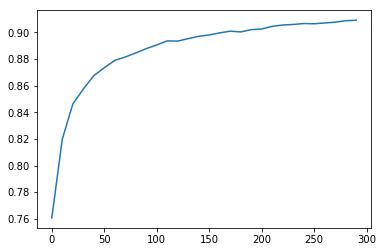

[0.91250002]


In [50]:
batch_size = 2048
keep_prob = .8

def neural_net_do(x_dict):
    # TF Estimator input is a dict, in case of multiple inputs
    x = x_dict['images']
    layer_1 = tf.layers.dense(x, n_hidden_1)
    layer_1 = tf.nn.dropout(layer_1, keep_prob)

    layer_2 = tf.layers.dense(layer_1, n_hidden_2)
    out_layer = tf.layers.dense(layer_2, num_classes)
    
    return out_layer


def model_do_fn(features, labels, mode):
    
    # Build the neural network
    logits = neural_net_do(features)
   
    # Predictions
    pred_classes = tf.argmax(logits, axis=1)
    pred_probas = tf.nn.softmax(logits)
    
    # If prediction mode, early return
    if mode == tf.estimator.ModeKeys.PREDICT:
        return tf.estimator.EstimatorSpec(mode, predictions=pred_classes) 
        
    # Define loss and optimizer
    
    loss_op = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(
        logits=logits, labels=tf.cast(labels, dtype=tf.int32)) )
    
    optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
    train_op = optimizer.minimize(loss_op, global_step=tf.train.get_global_step())
    
    # Evaluate the accuracy of the model
    acc_op = tf.metrics.accuracy(labels=labels, predictions=pred_classes)
    
    # TF Estimators requires to return a EstimatorSpec, that specify
    # the different ops for training, evaluating, ...
    estim_specs = tf.estimator.EstimatorSpec(
      mode=mode,
      predictions=pred_classes,
      loss=loss_op,
      train_op=train_op,
      eval_metric_ops={'accuracy': acc_op})
    return estim_specs

train_err3 = []
test_err3 = []
model_do = tf.estimator.Estimator(model_do_fn)

# close the logging info...
tf.logging.set_verbosity(0)
    
for epoc in range(30):
    model_do.train(input_fn_train, steps=10)

    train_err3.append(model_do.evaluate(input_fn_train2)['accuracy'])


x_axis = list(range(0,300,10))
plt.plot(x_axis, train_err3)
plt.show()

test_err3.append(model_do.evaluate(input_fn_test)['accuracy'])

print(test_err3)